In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv("test_1.csv", parse_dates=["fecha_hora"])
df.head()

,fecha_hora,Ro_1a_Media,Ro_1a_FC,Ro_1a_K,Ro_1b_Media,Ro_1b_FC,Ro_1b_K,Ro_2a_Media,Ro_2a_FC,Ro_2a_K,...,Ro_3a_K,Ro_3b_Media,Ro_3b_FC,Ro_3b_K,Ro_4a_Media,Ro_4a_FC,Ro_4a_K,Ro_4b_Media,Ro_4b_FC,Ro_4b_K
0,2003-10-22 12:06:24,0.104144,5.777850,1.069717,0.100250,5.966305,3.066925,0.107151,5.166521,0.209830,...,0.405831,0.108152,5.947454,0.777546,0.094804,3.788279,0.790736,0.099515,4.086150,1.808725
1,2003-10-22 12:09:13,0.103652,5.282236,1.162128,0.099853,4.972931,2.001798,0.108190,4.905319,0.229733,...,0.446120,0.108453,4.362016,0.682736,0.095070,3.856767,1.235297,0.093585,5.741343,1.873939
2,2003-10-22 12:14:13,0.105036,4.974196,0.986819,0.101540,4.637434,1.969725,0.108548,4.647262,0.209045,...,0.390100,0.109881,4.651150,0.750898,0.096157,3.589583,0.925227,0.098300,5.286029,1.430337
3,2003-10-22 12:19:13,0.104898,4.776455,1.034839,0.101570,4.495626,1.746089,0.108150,4.543583,0.189363,...,0.262319,0.110006,5.105655,0.667669,0.096813,3.539356,0.653119,0.098600,4.588643,1.378814
4,2003-10-22 12:24:13,0.104776,4.959475,1.110728,0.102188,4.486647,1.181742,0.107943,5.543711,0.261214,...,0.326564,0.109349,4.674347,0.475712,0.096359,3.412278,0.636024,0.098468,4.568625,1.498312


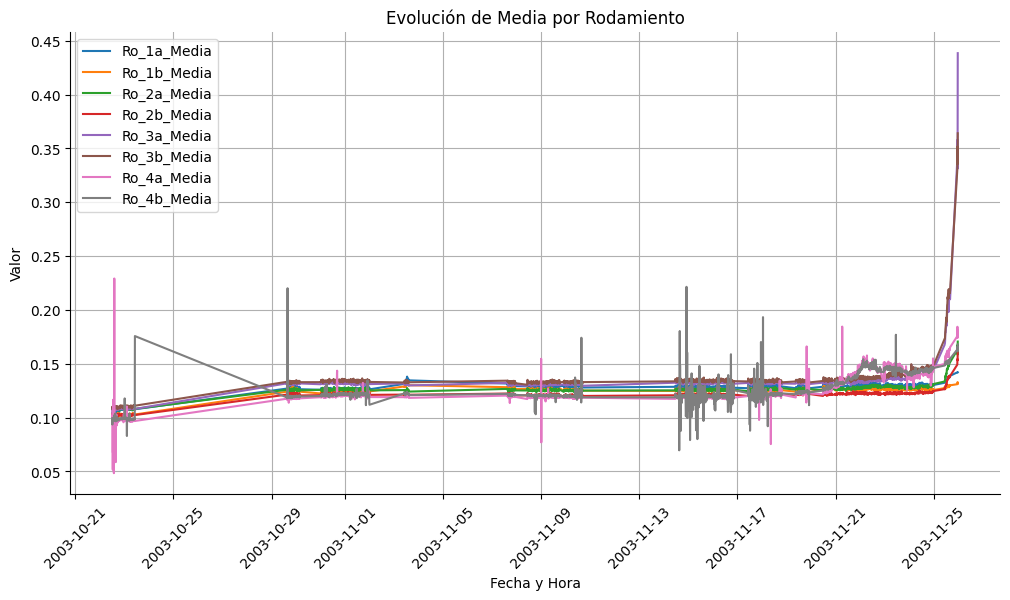

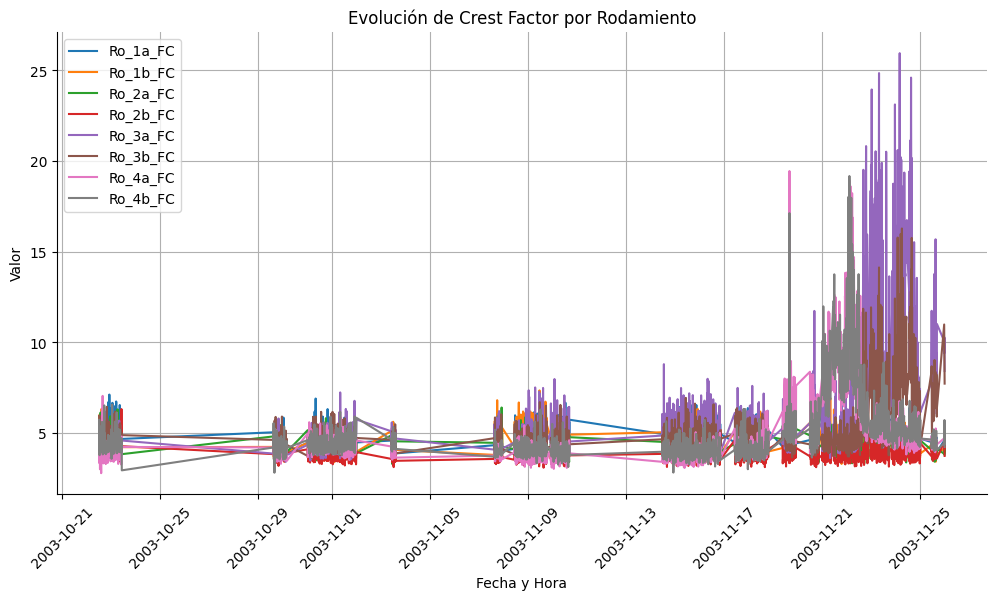

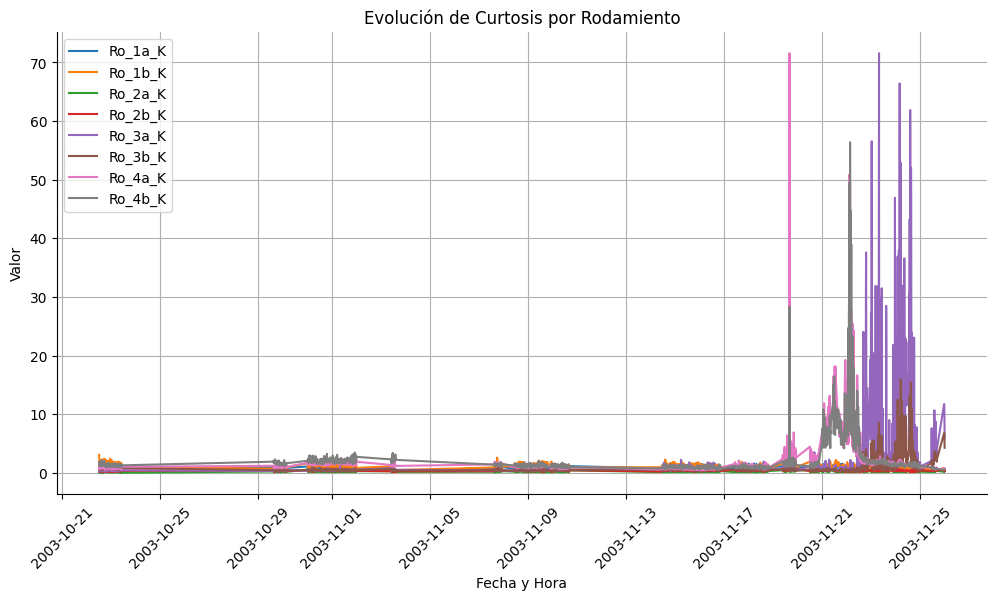

In [11]:
# Filtrar las columnas por tipo
media_cols = [col for col in df.columns if col.endswith("_Media")]
fc_cols = [col for col in df.columns if col.endswith("_FC")]
k_cols = [col for col in df.columns if col.endswith("_K")]

# Función para graficar con Seaborn
def plot_data(df, columns, title):
    plt.figure(figsize=(12, 6))
    for col in columns:
        sns.lineplot(x=df["fecha_hora"], y=df[col], label=col)
    plt.xlabel("Fecha y Hora")
    plt.ylabel("Valor")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(loc="best")
    sns.despine()  # Elimina bordes innecesarios para una mejor visualización
    plt.grid()
    plt.show()

# Graficar cada conjunto de datos
plot_data(df, media_cols, "Evolución de Media por Rodamiento")
plot_data(df, fc_cols, "Evolución de Crest Factor por Rodamiento")
plot_data(df, k_cols, "Evolución de Curtosis por Rodamiento")

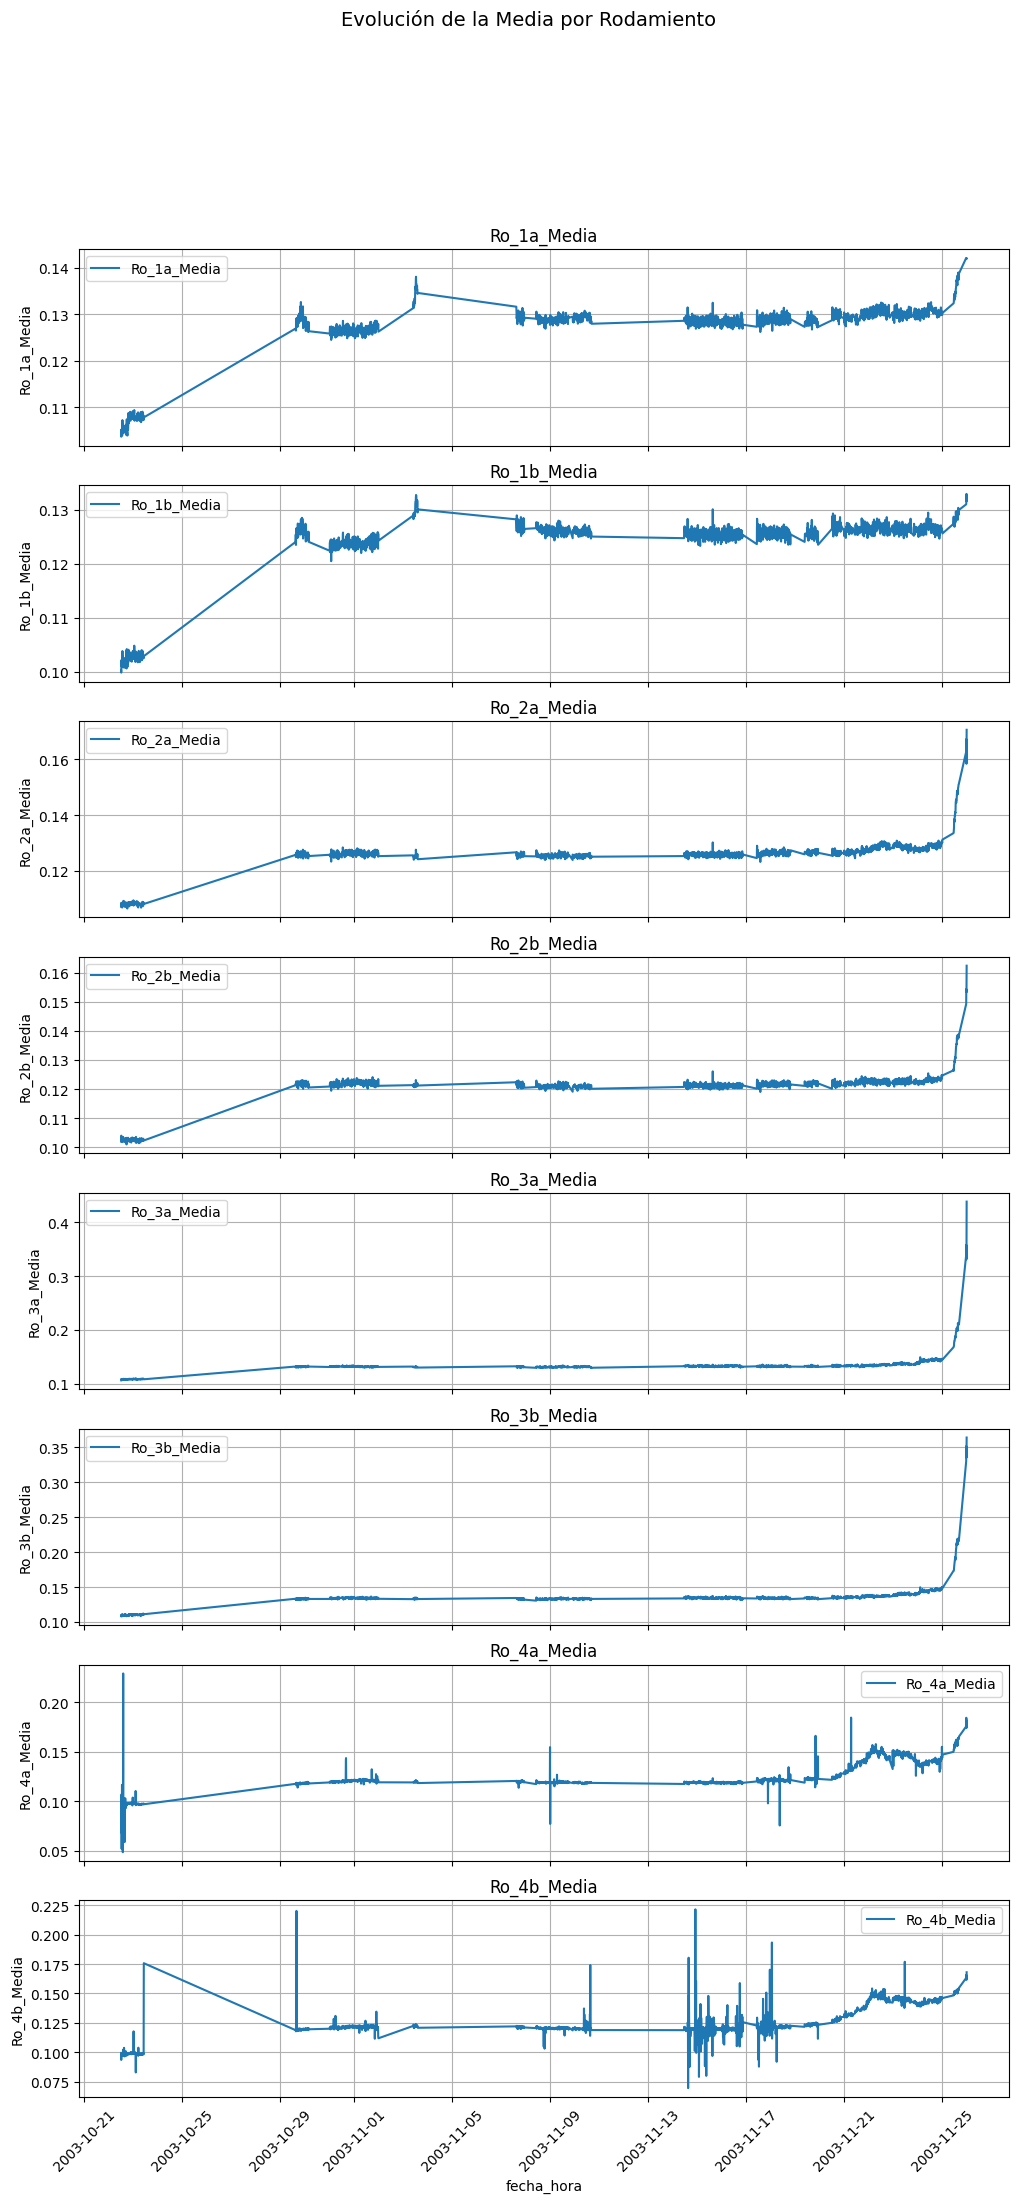

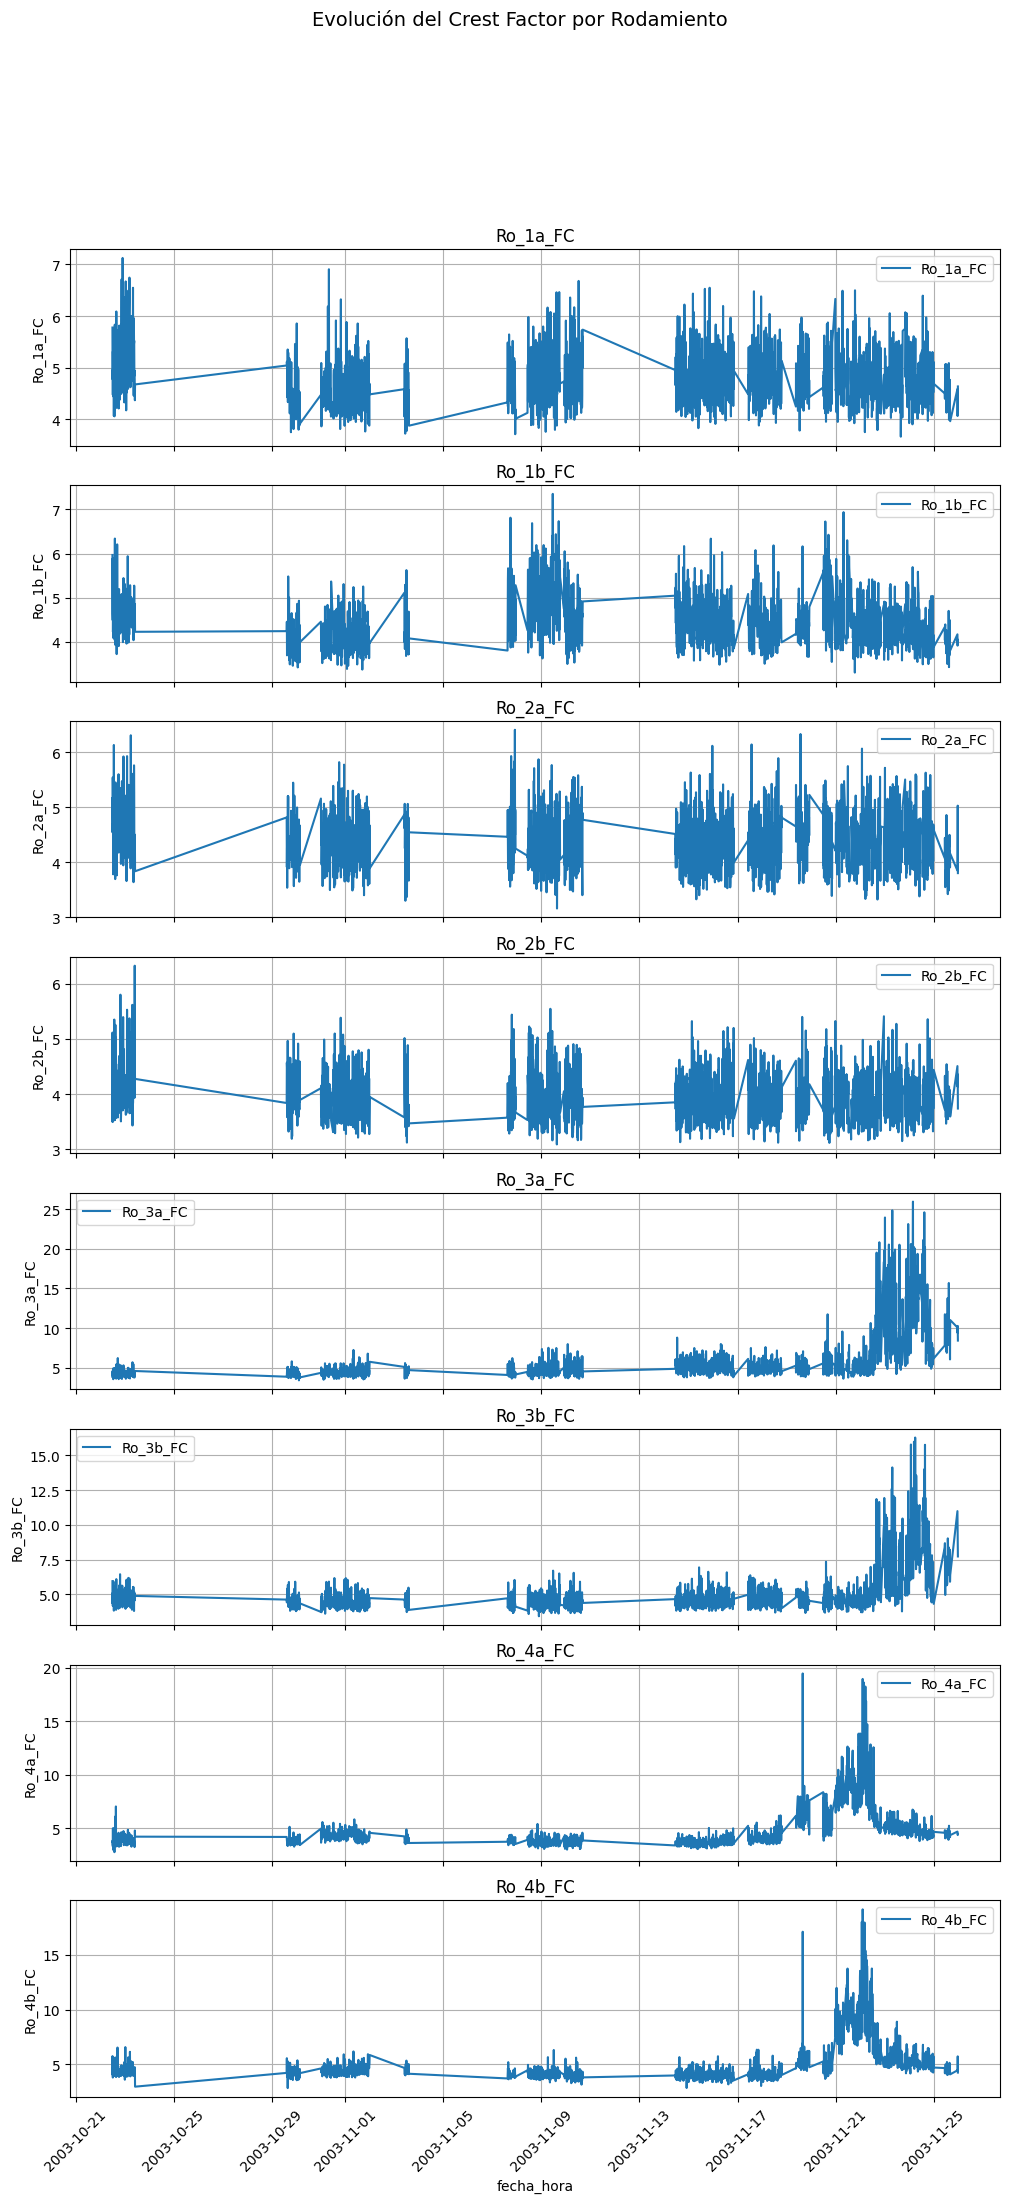

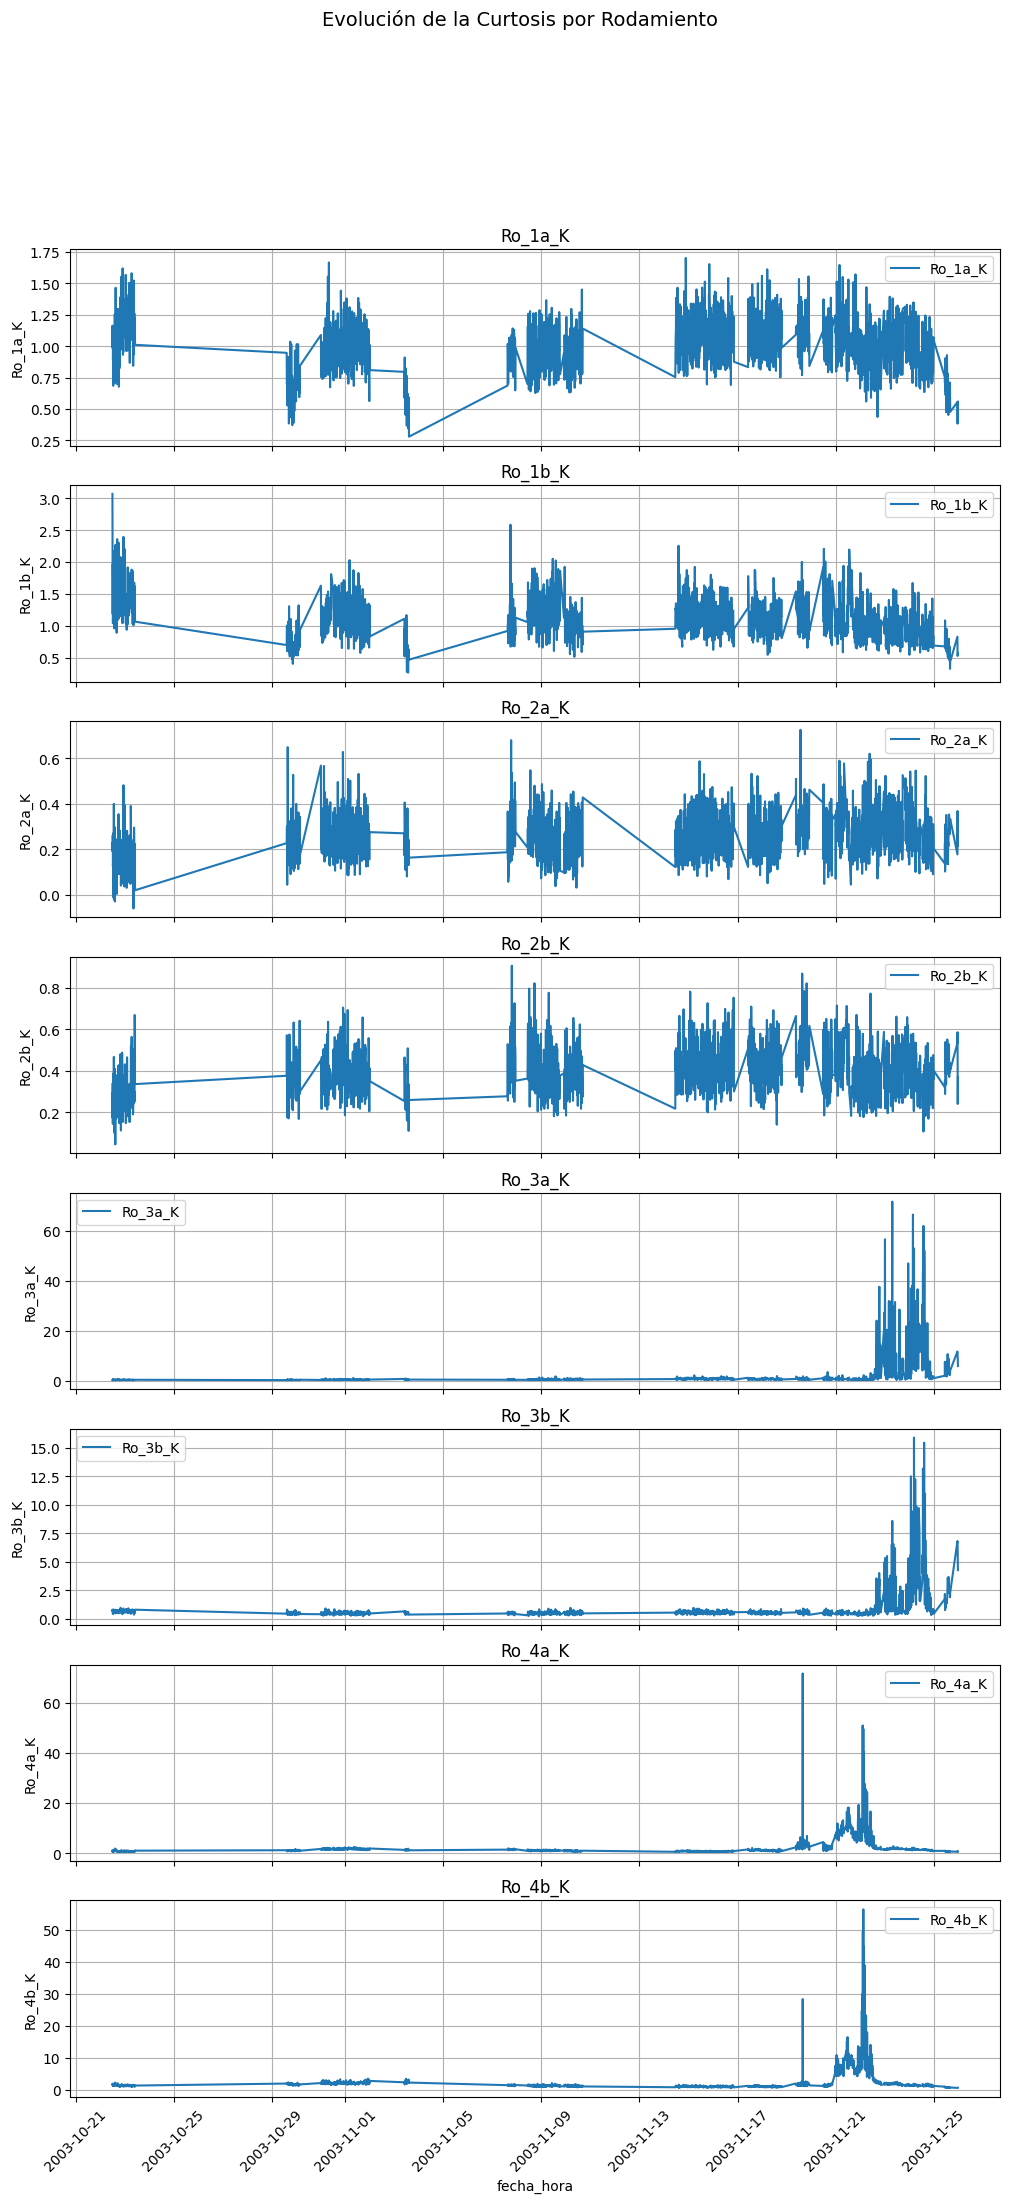

In [12]:
# Filtrar columnas por tipo
media_cols = [col for col in df.columns if col.endswith("_Media")]
fc_cols = [col for col in df.columns if col.endswith("_FC")]
k_cols = [col for col in df.columns if col.endswith("_K")]

# Función para graficar en subgráficos
def plot_subplots(df, columns, title):
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 3 * num_cols), sharex=True)
    
    for ax, col in zip(axes, columns):
        sns.lineplot(x=df["fecha_hora"], y=df[col], ax=ax, label=col)
        ax.set_title(col)
        ax.grid(True)

    plt.suptitle(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Graficar en subgráficos
plot_subplots(df, media_cols, "Evolución de la Media por Rodamiento")
plot_subplots(df, fc_cols, "Evolución del Crest Factor por Rodamiento")
plot_subplots(df, k_cols, "Evolución de la Curtosis por Rodamiento")

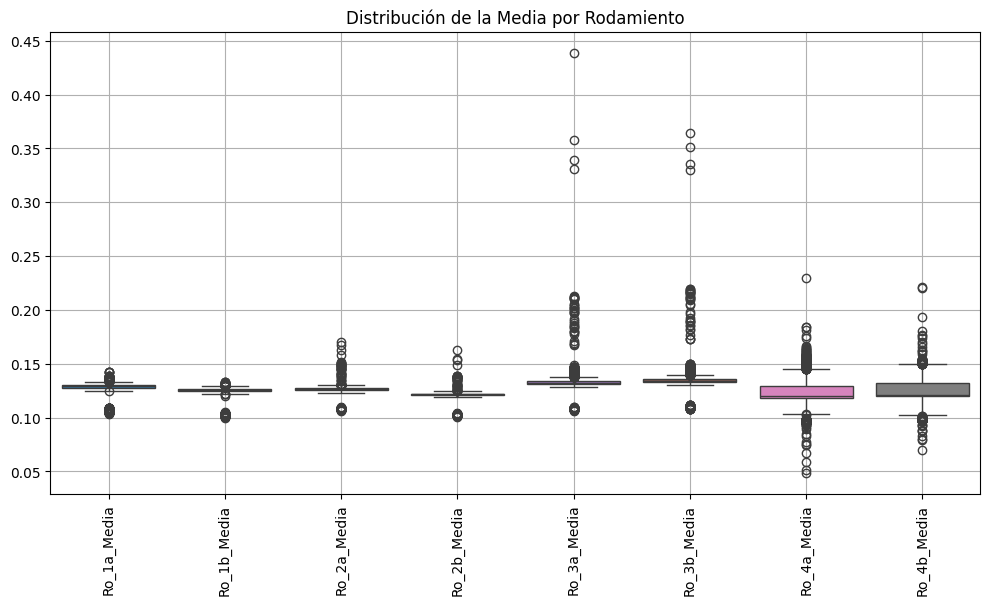

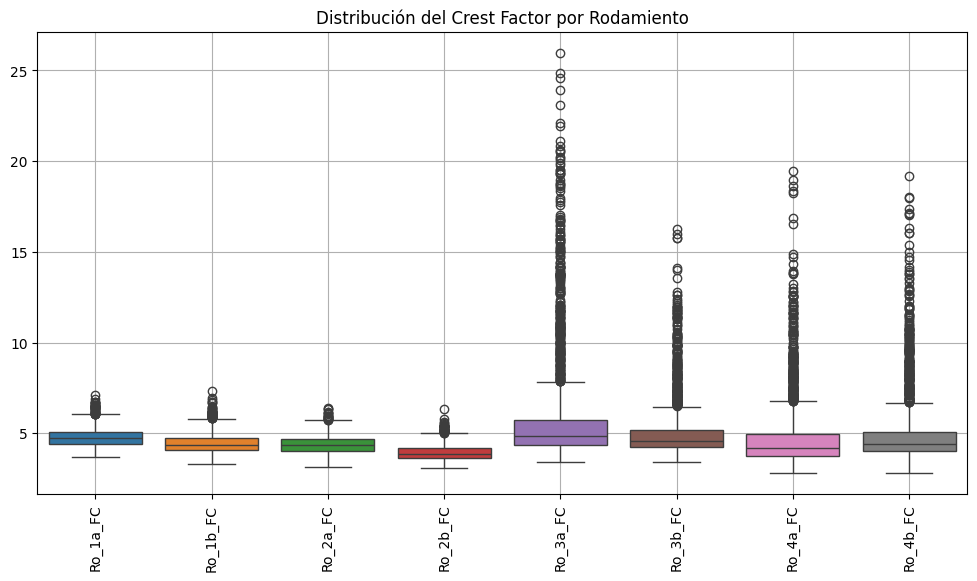

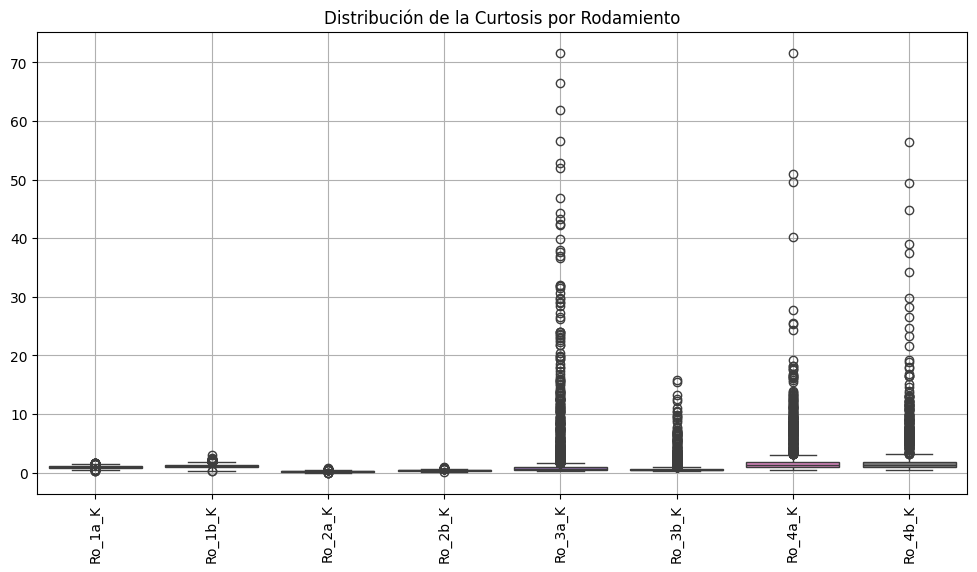

In [13]:
# Boxplot para cada tipo de variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[media_cols])
plt.xticks(rotation=90)  # Rotar etiquetas si son muchas
plt.title("Distribución de la Media por Rodamiento")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[fc_cols])
plt.xticks(rotation=90)
plt.title("Distribución del Crest Factor por Rodamiento")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[k_cols])
plt.xticks(rotation=90)
plt.title("Distribución de la Curtosis por Rodamiento")
plt.grid()
plt.show()

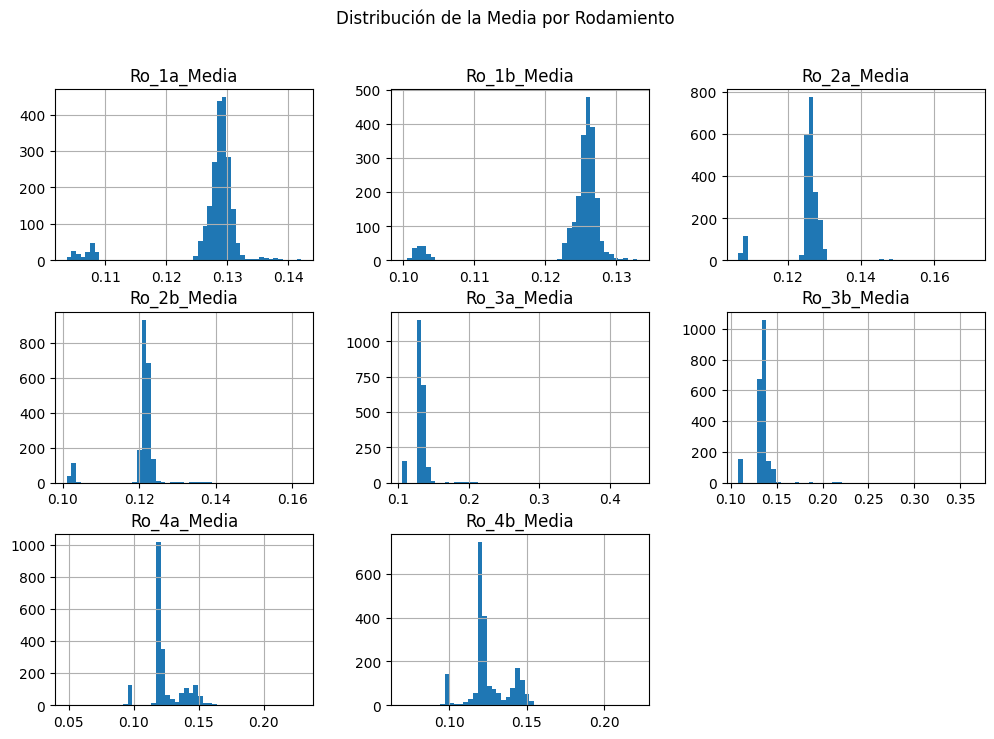

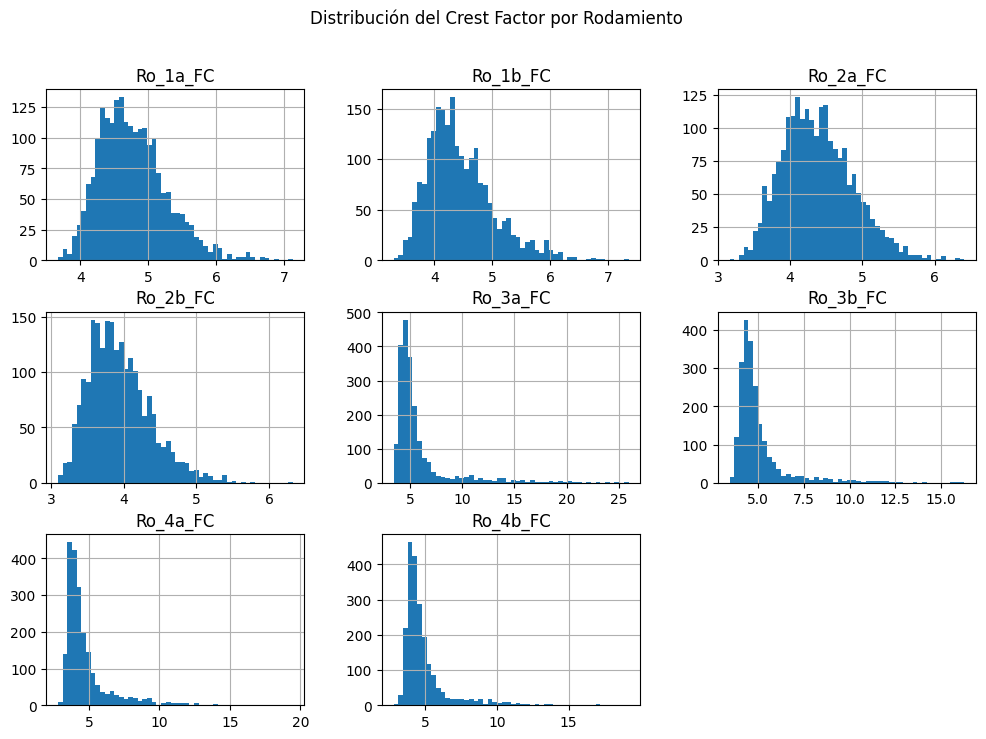

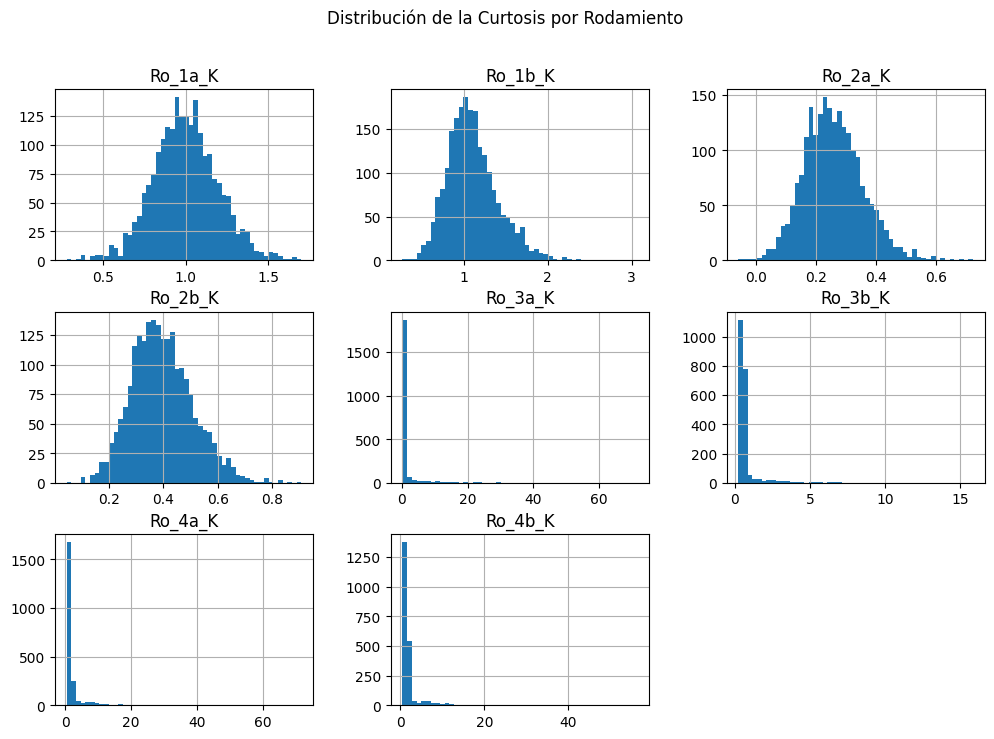

In [14]:
# Histograma para cada tipo de variable
df[media_cols].hist(figsize=(12, 8), bins=50)
plt.suptitle("Distribución de la Media por Rodamiento")
plt.show()

df[fc_cols].hist(figsize=(12, 8), bins=50)
plt.suptitle("Distribución del Crest Factor por Rodamiento")
plt.show()

df[k_cols].hist(figsize=(12, 8), bins=50)
plt.suptitle("Distribución de la Curtosis por Rodamiento")
plt.show()

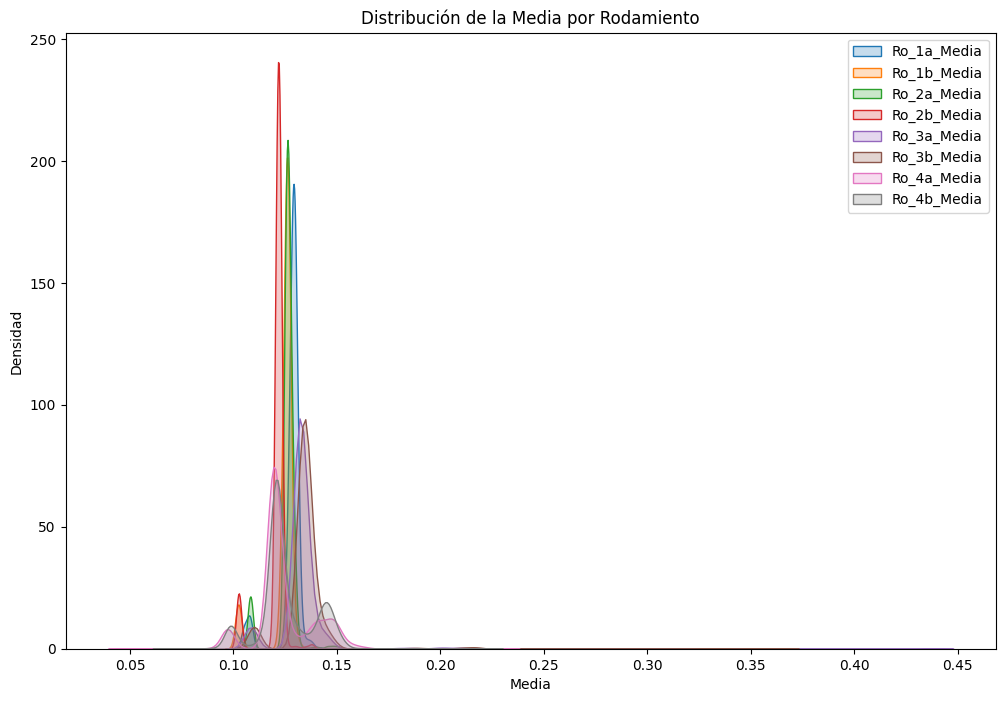

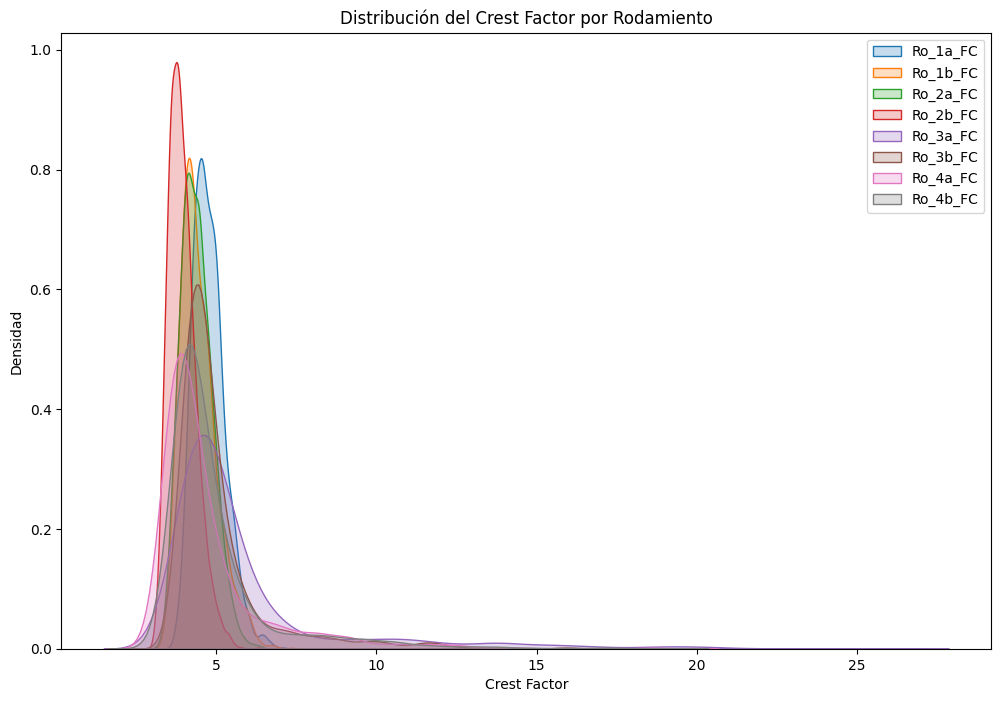

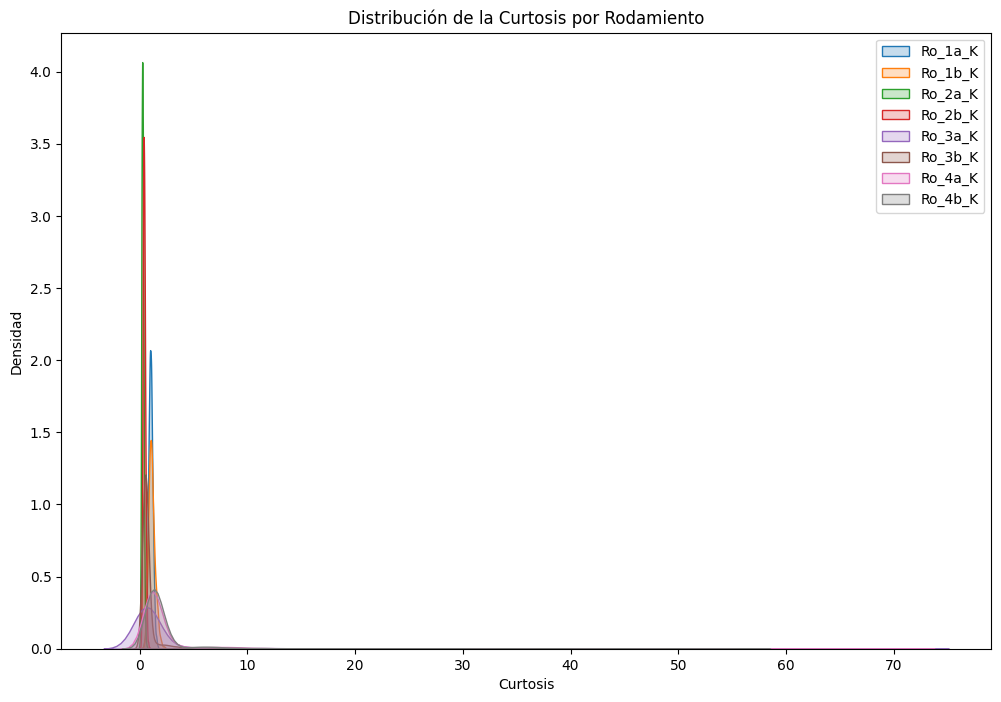

In [16]:
# Gráfico de densidad para las columnas 'Media'
plt.figure(figsize=(12, 8))
for col in media_cols:
    sns.kdeplot(df[col], fill=True, label=col)  # Usar fill=True en lugar de shade=True
plt.title("Distribución de la Media por Rodamiento")
plt.xlabel("Media")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Gráfico de densidad para las columnas 'Crest Factor'
plt.figure(figsize=(12, 8))
for col in fc_cols:
    sns.kdeplot(df[col], fill=True, label=col)  # Usar fill=True en lugar de shade=True
plt.title("Distribución del Crest Factor por Rodamiento")
plt.xlabel("Crest Factor")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Gráfico de densidad para las columnas 'Curtosis'
plt.figure(figsize=(12, 8))
for col in k_cols:
    sns.kdeplot(df[col], fill=True, label=col)  # Usar fill=True en lugar de shade=True
plt.title("Distribución de la Curtosis por Rodamiento")
plt.xlabel("Curtosis")
plt.ylabel("Densidad")
plt.legend()
plt.show()